In [1]:
import pickle

import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from utils import preprocess_data


In [2]:
data = pd.read_csv("../labeled_data.csv")
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


155/155 [==============================] - 9s 51ms/step


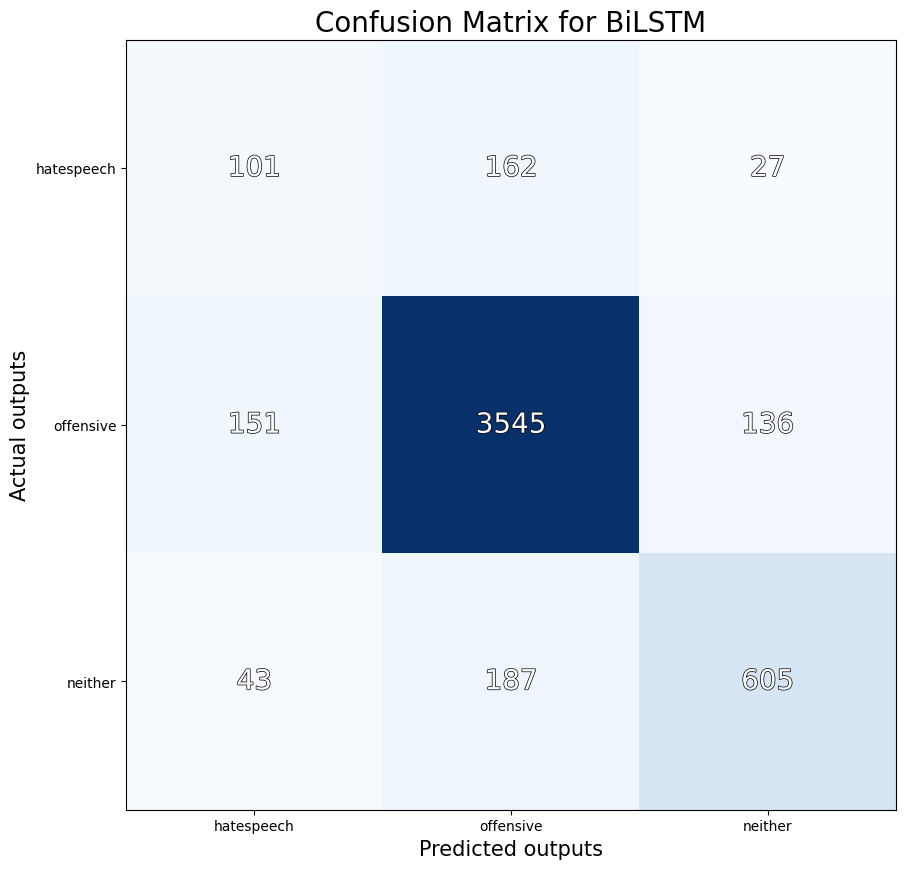

In [3]:
text, labels, vocab_size = preprocess_data(data)
X_train, X_test, y_train, y_test = train_test_split(
    text, labels, test_size=0.2, random_state=42
)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = load_model("../models/bilstm.h5")

y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_labels)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xlabel("Predicted outputs", fontsize=15)
ax.set_ylabel("Actual outputs", fontsize=15)
ax.xaxis.set(ticks=range(3), ticklabels=["hatespeech", "offensive", "neither"])
ax.yaxis.set(ticks=range(3), ticklabels=["hatespeech", "offensive", "neither"])

plt.title("Confusion Matrix for BiLSTM", fontsize=20)

for i in range(3):
    for j in range(3):
        ax.text(
            j,
            i,
            cm[i, j],
            ha="center",
            va="center",
            color="white",
            fontsize=20,
            path_effects=[pe.withStroke(linewidth=1, foreground="black")],
        )
plt.show()